# More Titanic? More Titanic.

![titanic picture from wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/600px-RMS_Titanic_3.jpg)

In [4]:
# first, need our imports and to grab the data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [69]:
# Let's look and remember what's in the data
df = pd.read_csv("data/titanic.csv")

In [70]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

### What are the most common last names?

Wait, the last names are part of the full name column... first we'll need to grab the last names!

A few ways we can do this:

In [71]:
# Need to grab last names ... but how?

df['Last Name'] = df['Name'].str.split(",").map(lambda x: x[0])


In [72]:
ln_list = []
for row in df.index:
    ln_series = df['Name'].str.split(",")[row][0]
    ln_list.append(ln_series)
ln_list

['Braund',
 'Cumings',
 'Heikkinen',
 'Futrelle',
 'Allen',
 'Moran',
 'McCarthy',
 'Palsson',
 'Johnson',
 'Nasser',
 'Sandstrom',
 'Bonnell',
 'Saundercock',
 'Andersson',
 'Vestrom',
 'Hewlett',
 'Rice',
 'Williams',
 'Vander Planke',
 'Masselmani',
 'Fynney',
 'Beesley',
 'McGowan',
 'Sloper',
 'Palsson',
 'Asplund',
 'Emir',
 'Fortune',
 "O'Dwyer",
 'Todoroff',
 'Uruchurtu',
 'Spencer',
 'Glynn',
 'Wheadon',
 'Meyer',
 'Holverson',
 'Mamee',
 'Cann',
 'Vander Planke',
 'Nicola-Yarred',
 'Ahlin',
 'Turpin',
 'Kraeff',
 'Laroche',
 'Devaney',
 'Rogers',
 'Lennon',
 "O'Driscoll",
 'Samaan',
 'Arnold-Franchi',
 'Panula',
 'Nosworthy',
 'Harper',
 'Faunthorpe',
 'Ostby',
 'Woolner',
 'Rugg',
 'Novel',
 'West',
 'Goodwin',
 'Sirayanian',
 'Icard',
 'Harris',
 'Skoog',
 'Stewart',
 'Moubarek',
 'Nye',
 'Crease',
 'Andersson',
 'Kink',
 'Jenkin',
 'Goodwin',
 'Hood',
 'Chronopoulos',
 'Bing',
 'Moen',
 'Staneff',
 'Moutal',
 'Caldwell',
 'Dowdell',
 'Waelens',
 'Sheerlinck',
 'McDermott',

In [73]:
pd.Series(name [0] for name in df['Name'].str.split(", "))

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Length: 891, dtype: object

`groupby` or `value_counts`?

In [74]:
df[['PassengerId', 'Last Name']].groupby(by = "Last Name").count().sort_values(by = "PassengerId", ascending = False)

,PassengerId
Last Name,
Andersson,9
Sage,7
Skoog,6
Carter,6
Goodwin,6
...,...
Henry,1
Hewlett,1
Hirvonen,1


In [75]:
most_common_ln = df['Last Name'].value_counts().head(8)
most_common_ln

Andersson    9
Sage         7
Panula       6
Carter       6
Skoog        6
Goodwin      6
Johnson      6
Rice         5
Name: Last Name, dtype: int64

Now let's visualize:

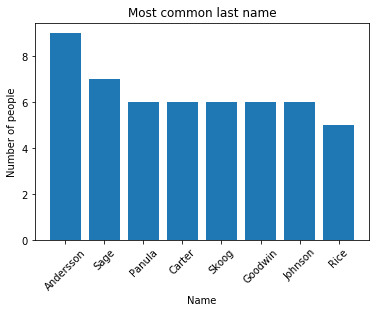

In [67]:
# Plot a bar graph of the most common last names
%matplotlib inline
plt.bar(most_common_ln.index, most_common_ln)
plt.title("Most common last name")
plt.xlabel("Name")
plt.ylabel("Number of people")
plt.xticks(rotation = 45)
plt.show()

### Who Paid the Most Fare?

As always - a few ways we can do this: `.loc` versus `sort_values`

In [81]:
max_fare

512.3292

In [97]:
max_fare = df['Fare'].max()
df.loc[df['Fare'] == max_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer


max_fare

And let's visualize some more!

In [ ]:
# Plot a histogram - but now, let's do all fares


In [ ]:
# Okay that's pretty bland, let's see if we can add more detail


## Seaborn 

![Sam Seaborn from West Wing, image from the TV guide](https://tvguide1.cbsistatic.com/i/2017/01/07/0f1a6ab5-8c63-4869-9f85-5d8b2b14913b/cf2e9396152ee85468e5bcfe063053a4/010717-west-wing-rob-lowe-news.jpg)

[Seaborn, I choose you!](https://elitedatascience.com/python-seaborn-tutorial) (aka an excellent exploration of the functionality of Seaborn)

Now let's practice with Seaborn:

In [ ]:
import seaborn as sns
sns.set(style='darkgrid')
# Same as sns.set_style('darkgrid')

In [ ]:
# We've mentioned pairplots, let's take a look...


In [ ]:
# Try out a swarm plot with class and age


In [ ]:
# Let's try a categorical plot (used to be a factor plot)
# Do the same swarmplot, but now make columns of survived
